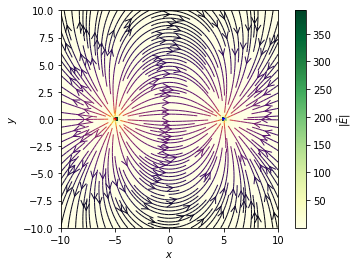

In [139]:
import scipy as sp
import matplotlib.pyplot as pp
from matplotlib.patches import Circle

#Visualize electric field between two charges
#Taken from https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
#Added a few things

#Define the magnitude of electric field at given (x,y) due to a charge q at location r
def field(q,r,x,y):
    den = ((x-r[0])**2+(y-r[1])**2)**1.5
    return q*(x-r[0])/den , q*(y-r[1])/den

#Initialize meshgrids
numpts = 100
x = sp.linspace(-10,10,numpts)
y = x
xmesh,ymesh = sp.meshgrid(x,y)

#due to single charge at (0,0)
#pos = (0,0)
#Ex,Ey = field(-1,pos,xmesh,ymesh)

#due to two charges at (-5,-5) and (5,5)
charges = [(5,(-5,0)),(-5,(5,0))]
Ex, Ey = sp.zeros((numpts,numpts)), sp.zeros((numpts,numpts))
for charge in charges:
    ex, ey = field(*charge,x=xmesh,y=ymesh)
    Ex += ex
    Ey += ey

#Plotting
fig,ax = pp.subplots()
color = sp.log(sp.sqrt(Ex**2+Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=pp.cm.inferno,\
              density=2, arrowstyle='->', arrowsize=1.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_aspect('equal')

im = ax.imshow(sp.sqrt(Ex**2+Ey**2),extent=[x.min(),x.max(),y.min(),y.max()],cmap='YlGn')
cb = fig.colorbar(im,label=r'$\| \vec{ E } \|$')

#Add the charge themselves
charge_colors = {True: 'red', False: 'blue'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.1, color=charge_colors[q>0]))
    
pp.show()